In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import os
import collections
import seaborn as sns
import string

In [2]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/eshwar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/eshwar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
df = pd.read_csv("Tweeter_Data_IN.csv")
df.head(10)

,created_at,hashtags,favorite_count,id,lang,place,retweet_count,text,tweet_url,user_screen_name,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name.1,user_statuses_count
0,Wed Mar 25 06:20:02 +0000 2020,NaN,0,1242697733175220000,en,"Pune, India",0,Meditation and mindfulness tips for coping wit...,https://twitter.com/ShalomFloat/status/1242697...,ShalomFloat,Shalom float spa is the first dedicated float ...,252,382,97,24,India,Shalom Float Spa,ShalomFloat,1770
1,Wed Mar 25 06:36:25 +0000 2020,NaN,0,1242701857253980000,en,"Gandhinagar, India",0,Contribute to INDIA FIGHTS CORONA @ Gandhinaga...,https://twitter.com/prakashkalal/status/124270...,prakashkalal,NaN,693,175,107,0,"Gandhinagar, India",prks7,prakashkalal,73
2,Wed Mar 25 06:18:32 +0000 2020,NaN,0,1242697356249880000,en,"Bidhan Nagar, India",0,@DelhiPolice @DCPEastDelhi @msisodia @AamAadmi...,https://twitter.com/Bhartendulkar/status/12426...,Bhartendulkar,Senior Media Analyst @Indianpac | Ex Sr Report...,5273,609,2239,7,"Kolkata, India",Bhartendu Sharma,Bhartendulkar,6002
3,Wed Mar 25 06:05:46 +0000 2020,SSC_UFM_MAT_KARONA Corona UFM,9,1242694142242650000,en,"Maharashtra, India",19,#SSC_UFM_MAT_KARONA\n#Corona is slow poison #U...,https://twitter.com/patilkiii/status/124269414...,patilkiii,"Ab khushi de ke aazma le khuda, In ghamon se t...",1744,259,786,0,"Pune, India",ùï¨ùñáùñçùñéùñëùñÜùñòùñç ùïæùñöùñì...,patilkiii,1387
4,Wed Mar 25 06:31:10 +0000 2020,Corona pritamkumarmurari Voice,0,1242700536752700000,en,"Bokaro Steel City, India",0,https://t.co/P7eQiq8tFa Mata Di \nDoston ise #...,https://twitter.com/SINGERMurariPa1/status/124...,SINGERMurariPa1,"Singing,Dancing,Acting,Entertainment",4,2,163,0,‡§¨‡•ã‡§ï‡§æ‡§∞‡•ã ‡§∏‡•ç‡§ü‡•Ä‡§≤ ‡§∏‡§ø‡§ü‡•...,SINGER=Murari Pathak,SINGERMurariPa1,13
5,Wed Mar 25 06:11:55 +0000 2020,NaN,0,1242695689483750000,en,"Kanpur, India",0,@chintskap And my mum will be PhD in Corona vi...,https://twitter.com/BShirazi3/status/124269568...,BShirazi3,NaN,690,13,381,0,NaN,B.Shirazi,BShirazi3,170
6,Wed Mar 25 06:35:29 +0000 2020,NaN,0,1242701623509380000,en,"Mumbai, India",0,"@funnyhammy @GauravPandhi Dumbo, it's the amou...",https://twitter.com/amjadmaruf/status/12427016...,amjadmaruf,A proud Indian.,50620,3851,4938,6,"Mumbai, India",Amjad Maruf,amjadmaruf,56330
7,Wed Mar 25 06:15:49 +0000 2020,NaN,64,1242696672745940000,en,"Mumbai, India",12,. First they allowed Corona possessions. Now t...,https://twitter.com/devduttmyth/status/1242696...,devduttmyth,"Mythologist, Author, Illustrator, Columnist, S...",3905,738362,384,592,Mumbai,Devdutt Pattanaik,devduttmyth,37805
8,Wed Mar 25 06:23:14 +0000 2020,NaN,0,1242698536891760000,en,"Nilanga, India",0,@TV9Marathi \nKindly help us to break the chai...,https://twitter.com/AkKulkarni007/status/12426...,AkKulkarni007,NaN,164,11,55,0,hyderabad,Anurag Kulkarni,AkKulkarni007,75
9,Wed Mar 25 06:12:38 +0000 2020,NaN,1,1242695871260750000,en,"Mumbai, India",0,"When you are at safe at home, Corona is out bu...",https://twitter.com/NickelDani/status/12426958...,NickelDani,"Inspiring Lives of Millions, Educationist @MTE...",69,188,253,0,Mumbai,Nikhil Dani,NickelDani,674


In [5]:
df.shape

(44179, 19)

In [6]:
needed_columns = ['user_name', 'created_at','text','place']
df = df[needed_columns]
df.head()

,user_name,created_at,text,place
0,Shalom Float Spa,Wed Mar 25 06:20:02 +0000 2020,Meditation and mindfulness tips for coping wit...,"Pune, India"
1,prks7,Wed Mar 25 06:36:25 +0000 2020,Contribute to INDIA FIGHTS CORONA @ Gandhinaga...,"Gandhinagar, India"
2,Bhartendu Sharma,Wed Mar 25 06:18:32 +0000 2020,@DelhiPolice @DCPEastDelhi @msisodia @AamAadmi...,"Bidhan Nagar, India"
3,ùï¨ùñáùñçùñéùñëùñÜùñòùñç ùïæùñöùñì...,Wed Mar 25 06:05:46 +0000 2020,#SSC_UFM_MAT_KARONA\n#Corona is slow poison #U...,"Maharashtra, India"
4,SINGER=Murari Pathak,Wed Mar 25 06:31:10 +0000 2020,https://t.co/P7eQiq8tFa Mata Di \nDoston ise #...,"Bokaro Steel City, India"


In [7]:
user_names_all = list(df['user_name'])

In [8]:
df.user_name = df.user_name.astype('category')
df.user_name = df.user_name.cat.codes.astype(str)

df.created_at= pd.to_datetime(df.created_at).dt.date
df.head()

,user_name,created_at,text,place
0,14720,2020-03-25,Meditation and mindfulness tips for coping wit...,"Pune, India"
1,19364,2020-03-25,Contribute to INDIA FIGHTS CORONA @ Gandhinaga...,"Gandhinagar, India"
2,3239,2020-03-25,@DelhiPolice @DCPEastDelhi @msisodia @AamAadmi...,"Bidhan Nagar, India"
3,21357,2020-03-25,#SSC_UFM_MAT_KARONA\n#Corona is slow poison #U...,"Maharashtra, India"
4,13527,2020-03-25,https://t.co/P7eQiq8tFa Mata Di \nDoston ise #...,"Bokaro Steel City, India"


In [9]:
texts = df['text']

In [10]:
remove_url = lambda x: re.sub(r"https\S+","",str(x))
text_en_lr = texts.apply(remove_url)
text_en_lr.head()

0    Meditation and mindfulness tips for coping wit...
1    Contribute to INDIA FIGHTS CORONA @ Gandhinaga...
2    @DelhiPolice @DCPEastDelhi @msisodia @AamAadmi...
3    #SSC_UFM_MAT_KARONA\n#Corona is slow poison #U...
4     Mata Di \nDoston ise #Corona Ke Tarah Faila D...
Name: text, dtype: object

In [11]:
text_en_lr_lc = text_en_lr.apply(lambda x: x.lower())
text_en_lr_lc.head()

0    meditation and mindfulness tips for coping wit...
1    contribute to india fights corona @ gandhinaga...
2    @delhipolice @dcpeastdelhi @msisodia @aamaadmi...
3    #ssc_ufm_mat_karona\n#corona is slow poison #u...
4     mata di \ndoston ise #corona ke tarah faila d...
Name: text, dtype: object

In [12]:
text_en_lr_lc_pr = text_en_lr_lc.apply(lambda x: x.translate(str.maketrans('','',string.punctuation)))
text_en_lr_lc_pr.head()

0    meditation and mindfulness tips for coping wit...
1    contribute to india fights corona  gandhinagar...
2    delhipolice dcpeastdelhi msisodia aamaadmipart...
3    sscufmmatkarona\ncorona is slow poison ufm is ...
4     mata di \ndoston ise corona ke tarah faila do...
Name: text, dtype: object

In [13]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


In [14]:
stop_words = set(stopwords.words('english'))

In [15]:
en_stops = set(stop_words)

In [16]:
word_tokens = []
for i in range(0,len(text_en_lr_lc_pr)):
    word_tokens.append(word_tokenize(text_en_lr_lc_pr[i]))

In [17]:
text_en_lr_lc_pr_sr = []


In [18]:
text_en_lr_lc_pr_sr

[]

In [19]:
for temp in word_tokens:
    words = []
    words.append(temp)
    for word_temp in words:
        for temp_word in word_temp:
            if temp_word not in en_stops:
                text_en_lr_lc_pr_sr.append(temp_word)
                #print(str(temp_word))
    

In [20]:
word_list = [word for line in text_en_lr_lc_pr_sr for word in line.split()]
word_list[:30]

['meditation',
 'mindfulness',
 'tips',
 'coping',
 'corona',
 'virus',
 'pandemicas',
 'people',
 'become',
 'anxious',
 'selfquarantine',
 'homeexperts',
 'recommend',
 'mindfulness',
 'meditation',
 'practice',
 'proven',
 'to‚ä¶',
 'contribute',
 'india',
 'fights',
 'corona',
 'gandhinagar',
 'gujarat',
 'delhipolice',
 'dcpeastdelhi',
 'msisodia',
 'aamaadmiparty',
 'arvindkejriwal',
 'sir']

In [21]:
counts = collections.Counter(word_list).most_common(50)
counts_df=pd.DataFrame(counts)
counts_df
counts_df.columns = ['word', 'frequency']

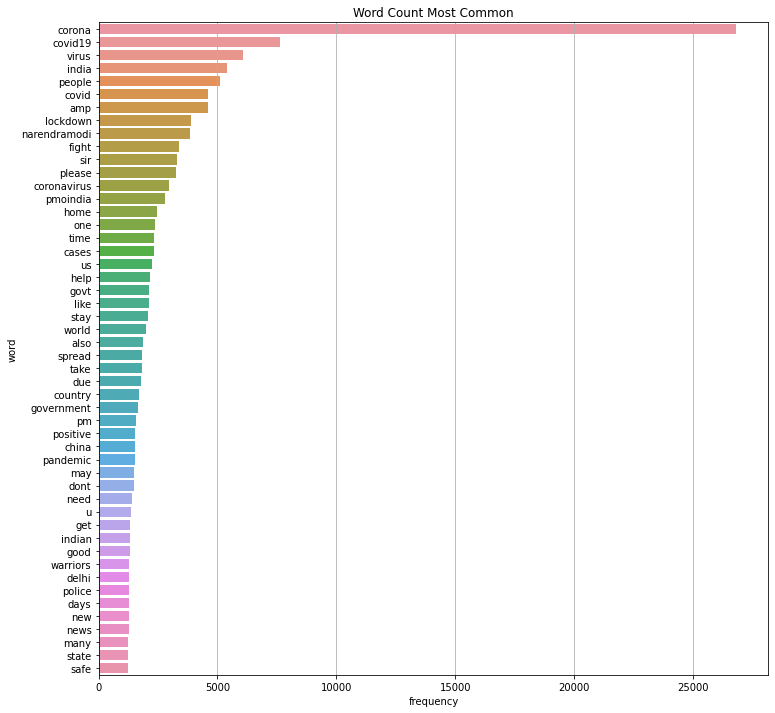

In [22]:
fig,ax = plt.subplots(figsize = (12,12))
plt.grid()
plt.title("Word Count Most Common")
ax = sns.barplot(y="word",x="frequency",ax=ax,data=counts_df)
plt.savefig('word_count_frequent.png')

In [23]:
places = df['place']
places = list(places)

In [24]:
cnt_places = collections.Counter(places).most_common(100)

In [25]:
cnt_places_df=pd.DataFrame(cnt_places)
cnt_places_df
cnt_places_df.columns = ['word', 'frequency']

Most Common 100 Places

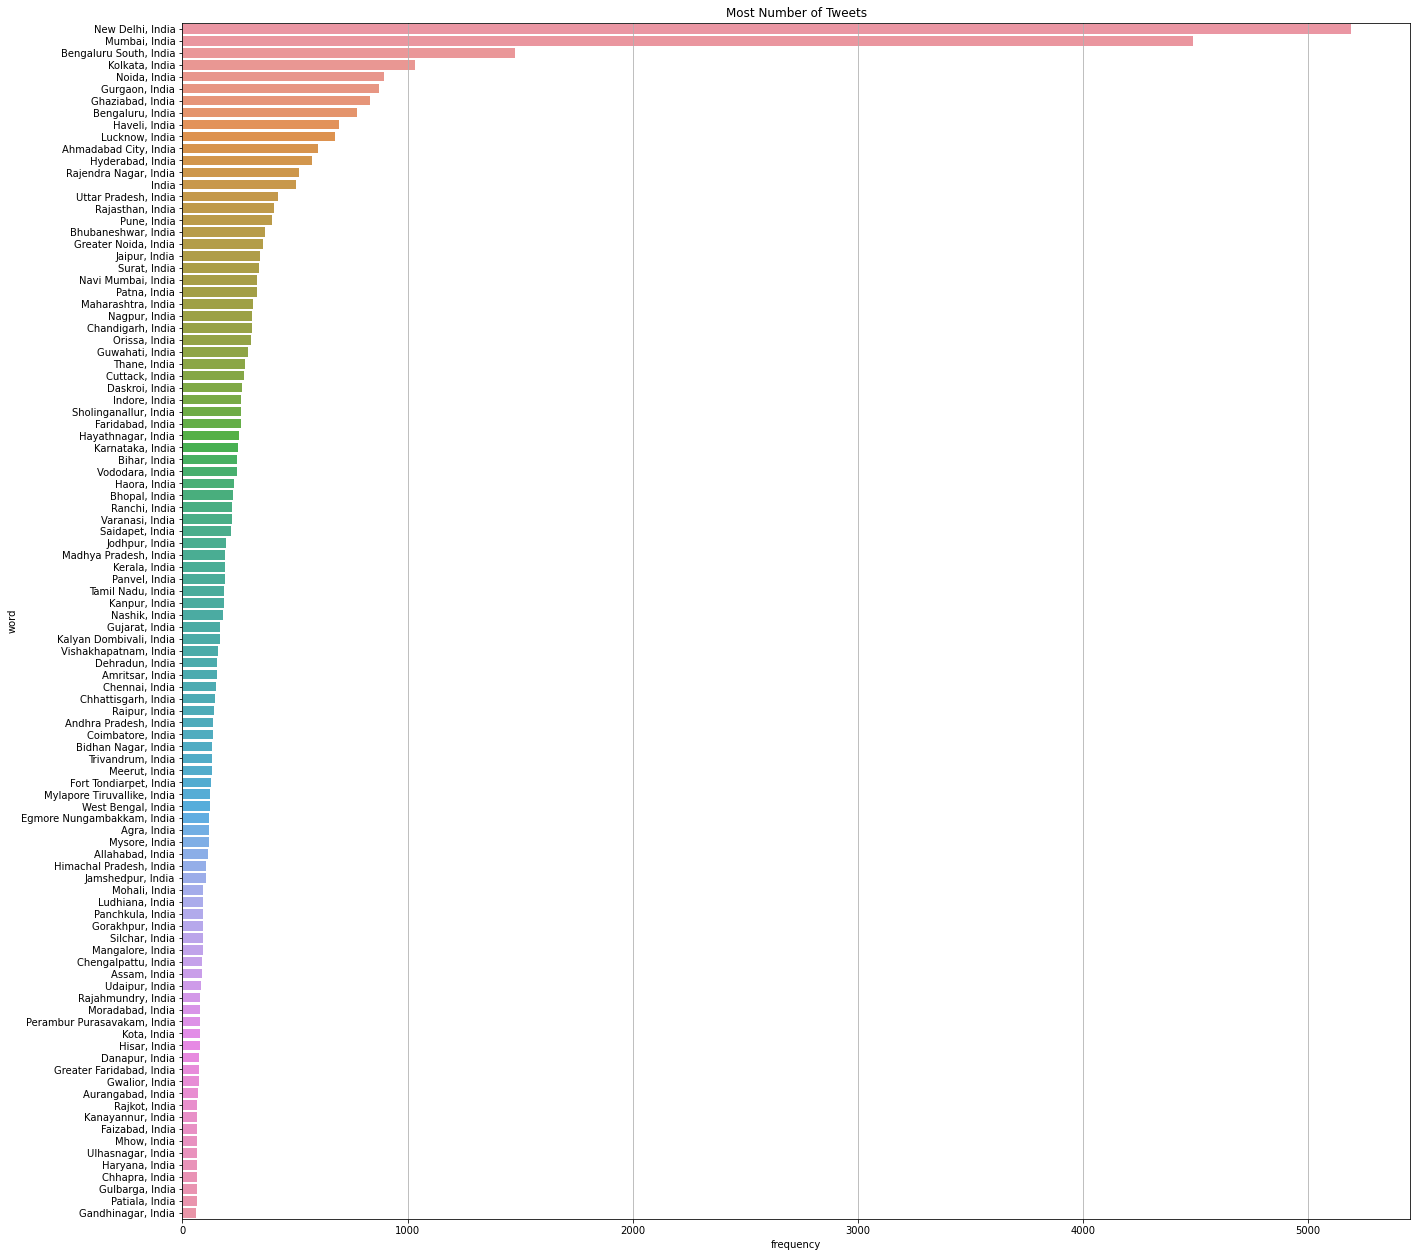

In [26]:
fig2,ax2 = plt.subplots(figsize = (22,22))
plt.grid()
plt.title("Most Number of Tweets")
ax2 = sns.barplot(y="word",x="frequency",ax=ax2,data=cnt_places_df)
plt.savefig('MostNumberofTweets.png')

In [27]:
#! pip3 install nltk

In [28]:
#! pip3 install textblob

In [29]:
all_locations = cnt_places_df["word"]

In [30]:
from mpl_toolkits.basemap import Basemap

In [31]:
locs = list(cnt_places_df.index)

In [32]:
from geopy.util import get_version
get_version()

'2.1.0'

In [33]:
!pip3 install geopy

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [34]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='twitter-analysis')

In [35]:
from geopy.exc import GeocoderTimedOut

def do_geocode(address, attempt=1, max_attempts=5):
    try:
        return geolocator.geocode(address)
    except GeocoderTimedOut:
        if attempt <= max_attempts:
            return do_geocode(address, attempt=attempt+1)
        raise

In [36]:
all_locations

0           New Delhi, India
1              Mumbai, India
2     Bengaluru South, India
3             Kolkata, India
4               Noida, India
               ...          
95            Haryana, India
96            Chhapra, India
97           Gulbarga, India
98            Patiala, India
99        Gandhinagar, India
Name: word, Length: 100, dtype: object

In [38]:
df_locations = pd.DataFrame()
for i in range(0,len(all_locations)):
    curr_loc = all_locations[i]
    geolocated = do_geocode(curr_loc)
    #print(geolocated)
    if(geolocated == None):
        continue
    curr_latitude = geolocated[1][0]
    if(curr_latitude == None):
        continue
    #print(curr_latitude)
    curr_longitude = geolocated[1][1]
    if(curr_latitude == None):
        continue
    #print(curr_longitude)
    
    # Append in Dataframe
    
    data = [{'Location': curr_loc, 'Latitude': curr_latitude, 'Longitude':curr_longitude}]
    
    df_locations=df_locations.append(data,ignore_index=True)
    
  
    


In [39]:
#geolocated[1][0]
df_locations

,Location,Latitude,Longitude
0,"New Delhi, India",28.613895,77.209006
1,"Mumbai, India",19.075990,72.877393
2,"Bengaluru South, India",12.979120,77.591300
3,"Kolkata, India",22.572672,88.363882
4,"Noida, India",28.570784,77.327107
...,...,...,...
90,"Haryana, India",29.000000,76.000000
91,"Chhapra, India",25.778410,84.751451
92,"Gulbarga, India",17.166667,77.083333
93,"Patiala, India",30.209087,76.339872


In [56]:
another_df = pd.DataFrame()

In [58]:
another_df = df_locations.drop('Location',axis=1)

In [59]:
another_df

,Latitude,Longitude
0,28.613895,77.209006
1,19.075990,72.877393
2,12.979120,77.591300
3,22.572672,88.363882
4,28.570784,77.327107
...,...,...
90,29.000000,76.000000
91,25.778410,84.751451
92,17.166667,77.083333
93,30.209087,76.339872


In [44]:
import cartopy.crs as ccrs
from matplotlib.patches import Circle

In [41]:
#! pip3 install Cartopy

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 12.1 MB 707 kB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  ERROR: Command errored out with exit status 1:
   command: /usr/bin/python3 /usr/local/lib/python3.6/dist-packages/pip/_vendor/pep517/_in_process.py get_requires_for_build_wheel /tmp/tmpp2xdzaan
       cwd: /tmp/pip-install-lpnt8wjz/cartopy
  Complete output (1 lines):
  Proj 4.9.0 must be installed.
  ----------------------------------------
ERROR: Command errored out with exit status 1: /usr/bin/python3 /usr/local/lib/python3.6/dist-packages/pip/_vendor/pep517/_in_process.py get_requires_for_build_wheel /tmp/tmpp2xdzaan Check the logs for full command output.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [63]:
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 20})
plt.rcParams['figure.figsize'] = (20, 10)

In [64]:
#geolocated

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

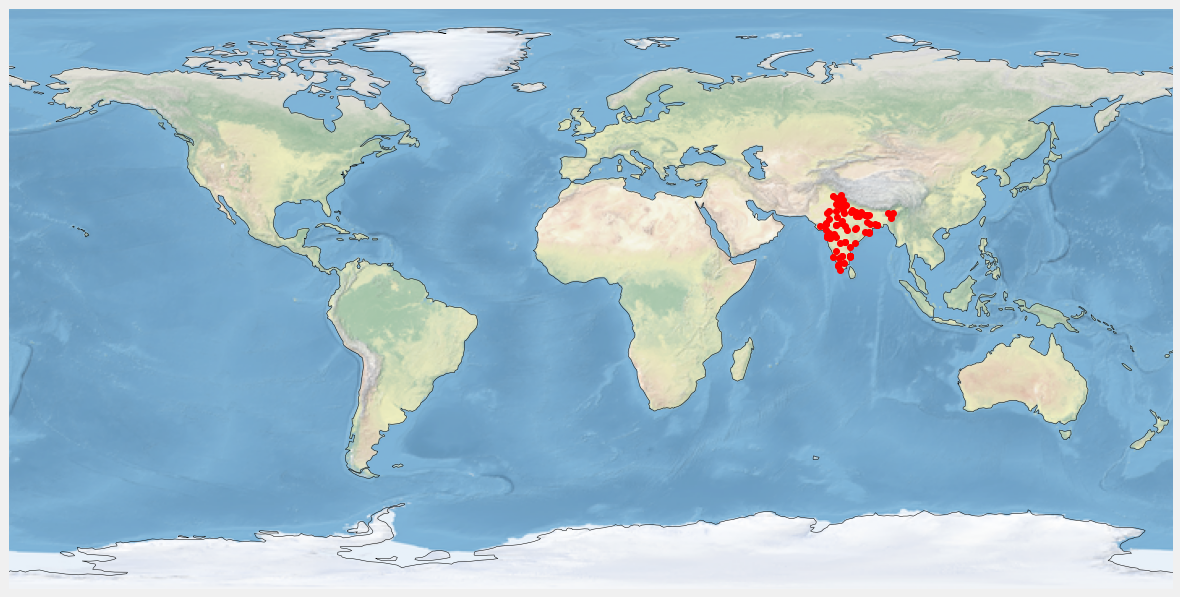

In [71]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
ax.plot(df_locations.Longitude, df_locations.Latitude, 'ro', transform=ccrs.PlateCarree())
ax.coastlines(resolution='110m')
ax.set_global()
#ax.set_extent([20, -20, 45,60])
def get_radius(freq):
    if freq < 50:
        return 0.5
    elif freq < 200:
        return 1.2
    elif freq < 1000:
        return 1.8
    
for i,x in another_df.iteritems():
    ax.add_patch(Circle(xy=[i[2], i[1]], radius=get_radius(x), color='blue', alpha=0.6, transform=ccrs.PlateCarree()))
    
plt.savefig("WorldMap.png")
plt.show()


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

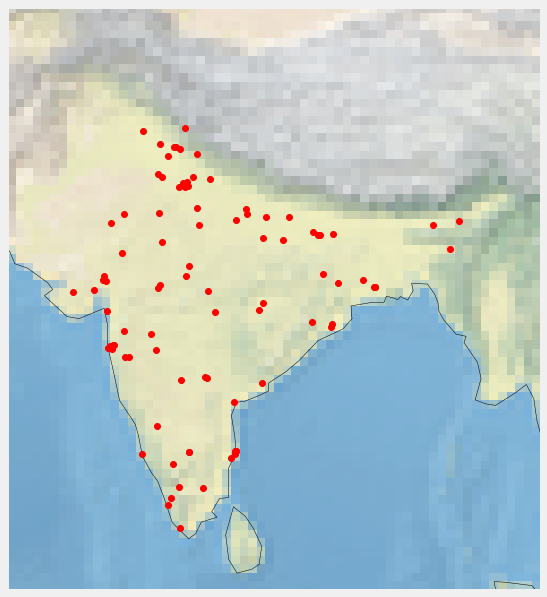

In [70]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
ax.plot(df_locations.Longitude, df_locations.Latitude, 'ro', transform=ccrs.PlateCarree())
ax.coastlines(resolution='110m')
ax.set_global()
ax.set_extent([67.0, 98.0, 5.0, 38.0])
def get_radius(freq):
    if freq < 50:
        return 0.5
    elif freq < 200:
        return 1.2
    elif freq < 1000:
        return 1.8
    
for i,x in another_df.iteritems():
    ax.add_patch(Circle(xy=[i[2], i[1]], radius=get_radius(x), color='blue', alpha=0.6, transform=ccrs.PlateCarree()))
plt.savefig("India.png")
plt.show()


In [ ]:
from textblob import TextBlob

In [ ]:
import nltk

In [ ]:
nltk.download('brown')

In [ ]:
nltk.download('averaged_perceptron_tagger')

In [ ]:
'''     Sentiment Analysis '''

In [ ]:
from textblob.sentiments import NaiveBayesAnalyzer

In [ ]:
text_en_lr_lc_pr

In [ ]:
import random

In [ ]:
dictionary_name = {}
for i in range(0,len(user_names_all)):
    dictionary_name[text_en_lr_lc_pr[i]] = user_names_all[i]

In [ ]:
dictionary_name

In [ ]:
selected_text = random.choice(text_en_lr_lc_pr)

In [ ]:
print(selected_text)

In [ ]:
dictionary_name[selected_text]    # The person who has tweeted

In [ ]:
analysis = TextBlob(selected_text).sentiment

In [ ]:
print(analysis)
if(analysis.polarity < 0.5):
    print("Positive")
    
else:
    print("Negative")

Using Naive Bayes classifier Analyzer

In [ ]:
blob_object = TextBlob(selected_text, analyzer=NaiveBayesAnalyzer())
analysis_2 = blob_object.sentiment
print(analysis_2)

positive = analysis_2.p_pos * 100
negative = analysis_2.p_neg * 100

In [ ]:
# Graph of Positivity vs Negativity


In [ ]:
plt.bar("positive",positive,color='b')
plt.bar("Negative",negative,color='r')
plt.show()

In [ ]:
#! git init

In [ ]:
# Wordcloud

In [ ]:
#! pip3 install wordcloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
cloud_words = str(word_list)

In [ ]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white').generate_from_text(cloud_words)

In [ ]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

plt.savefig('WordCloud.png')